In [6]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

## Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation of 5 using Python. Interpret the results.

In [7]:
sample_mean = 50
sample_std = 5
sample_size = 100

dof = sample_size - 1

ci = 0.95
alpha = 1 - ci

t_crit = stats.t.ppf(q = 1 - alpha / 2, df = dof)
se = sample_std / np.sqrt(sample_size)
me = t_crit * se

lb = sample_mean - me
ub = sample_mean + me

print(f"The {ci * 100} Confidence Interval for the Population mean lies between {lb: .2f} and {ub:.2f}")

The 95.0 Confidence Interval for the Population mean lies between  49.01 and 50.99


## Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20% brown. Use Python to perform the test with a significance level of 0.05.

In [8]:
observed_val = np.asarray([20, 15, 10, 5, 20, 10])
expected_val = np.asarray([0.2, 0.2, 0.2, 0.1, 0.1, 0.2]) * np.sum(observed_val)
print(f"The sum of observed value : {sum(observed_val)} and sum of expected value : {sum(expected_val)}")

alpha = 0.05
dof = len(observed_val) - 1

null_hypo = "The distribution of colors of M&Ms in the bag matches the expected distribution."
alt_hypo = "The distribution of colors of M&Ms in the bag matches the doesn't match the expected distribution."

chi_stats, p_val = stats.chisquare(observed_val, expected_val)
chi_critical = stats.chi2.ppf(1 - alpha / 2, dof)

print("The critical value is:", chi_critical)

if p_val > alpha :
    print("Reject the null hypothesis")
    print("Conclusion:", alt_hypo)
else:
    print("Failed to reject the null hypothesis")
    print("Conclusion:", null_hypo)

The sum of observed value : 80 and sum of expected value : 80.0
The critical value is: 12.832501994030027
Failed to reject the null hypothesis
Conclusion: The distribution of colors of M&Ms in the bag matches the expected distribution.


## Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following data:

||Group A|	Group B|
|---|---|---|
|Outcome 1|	20|	15|
|Outcome 2|	10|	25|
|Outcome 3|	15|	20|

## Interpret the results of the test.

In [9]:
obs = [20,10,15]
expected = [15,25,20]
data = [obs, expected]

null_hypothesis = "The outcomes are independent of the groups."
alternate_hypothesis = "The outcomes are Dependent on the groups."

stat, p_val, dof, expected = stats.chi2_contingency(data)

alpha = 0.05
print("p value is " + str(p_val))

if p_val <= alpha:
    print('Reject the Null Hypothesis')
    print("Conclusion:", alt_hypo)
else:
    print('Failed to reject the Null Hypothesis')
    print("Conclusion:", null_hypo)

p value is 0.05411376622282158
Failed to reject the Null Hypothesis
Conclusion: The distribution of colors of M&Ms in the bag matches the expected distribution.


## Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the population who smoke.

In [10]:
n = 500
pop = 60

p = pop / n

dof = pop - 1

se = np.sqrt(p * (1 - p) / n)

ci = 0.95
alpha = 1 - ci

z_critical = stats.norm.ppf(q = 1 - alpha / 2)

print(f"The Z-Score critical value is: {z_critical}")

me = z_critical * se

lb = p - me
ub = p + me

print(f"The true proportion of individuals who smoke lie between {lb * 100: .2f}% and {ub * 100:.2f}% with a confidence level of {ci *100}%")

The Z-Score critical value is: 1.959963984540054
The true proportion of individuals who smoke lie between  9.15% and 14.85% with a confidence level of 95.0%


## Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results.

In [11]:
sample_mean = 75
sample_std = 12
sample_size = 100

dof = sample_size - 1

ci = 0.9
alpha = 1 - ci

t_crit = stats.t.ppf(q = 1 - alpha / 2, df = dof)

se = sample_std / np.sqrt(sample_size)
me = t_crit * se

lb = sample_mean - me
ub = sample_mean + me

print(f"The true population mean lies between {lb:.2f} and {ub:.2f} with a confidence level of {ci * 100}%")

The true population mean lies between 73.01 and 76.99 with a confidence level of 90.0%


## Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.

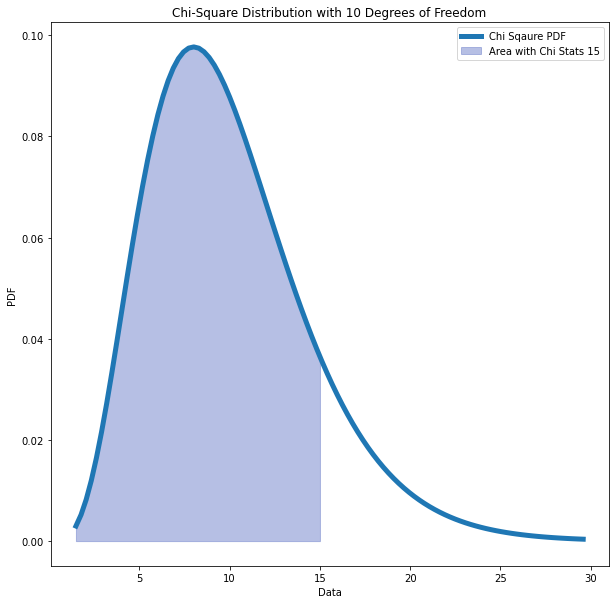

In [12]:
dof = 10
chi_stat = 15

data = np.linspace(stats.chi2.ppf(0.001, dof), stats.chi2.ppf(0.999, dof), num = 100)

fig, ax = plt.subplots(figsize = (10, 10))

pdf = stats.chi2.pdf(x = data, df = dof)

ax.plot(data, pdf, lw = 5, label = "Chi Sqaure PDF")

area = stats.chi2.cdf(x = chi_stat, df = dof)

x_fill = np.linspace(stats.chi2.ppf(0.001, dof), 15, 100)

ax.fill_between(x = x_fill, y1 = stats.chi2.pdf(x_fill, dof), alpha = 0.5, color = "#6F81CA", label = "Area with Chi Stats 15")

ax.legend()

plt.xlabel("Data")
plt.ylabel("PDF")
plt.title("Chi-Square Distribution with 10 Degrees of Freedom")
plt.show()

## Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.

In [13]:
sample_size = 1000
obs_coke  = 520
dof = sample_size - 1

p = obs_coke / sample_size

se = np.sqrt(p * ( 1 - p) / sample_size)

ci = 0.99
alpha = 1 - ci

t_crit = stats.t.ppf(1 - alpha / 2, df = dof)

me = t_crit * se

lb = p - me
ub = p + me

print(f"The true proportion of pei=ople who prefer Coke lies between {lb *100:.2f}% and {ub * 100: .2f}% with a confidence level of {ci * 100}%")

The true proportion of pei=ople who prefer Coke lies between 47.92% and  56.08% with a confidence level of 99.0%


## Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.

In [14]:
null_hypo = "The coin is not biased towards tails i.e. Fair"
alt_hypo = "The coin is biased towards tails i.e. Unfair"

sample_size = 100
obs = [45, 55]
expected = [50,50]

dof = sample_size - 1

alpha = 0.05
chi_critical = stats.chi2.ppf(q = 1 - alpha, df = dof)

chi_statistics,p_value = stats.chisquare(obs,expected)

if p_val <= alpha:
    print("Reject the Null Hypothesis")
    print("Conclusion:", alt_hypo)
else:
    print("Failed to reject the Null Hypothesis")
    print("Conclusion:", null_hypo)

Failed to reject the Null Hypothesis
Conclusion: The coin is not biased towards tails i.e. Fair


## Q9. A study was conducted to determine if there is an association between smoking status (smoker or non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between smoking status and lung cancer diagnosis.

||Lung Cancer:Yes	|Lung Cancer:No|
|---|---|---|
|Smoker|	60	|140|
|Non Smoker|	30	|170|

## Use a significance level of 0.05.

In [15]:
cancer = [60, 30]
non_cancer = [140,170]

observed_df = pd.DataFrame({'Lung Cancer:Yes':[60,30], 'Lung Cancer:No':[140,170]})
observed_df.index = ['Smoker','Non Smoker']

null_hypo = "There is no association between smoking status and lung cancer"
alt_hypo = "There is an association between smoking status and lung cancer"

alpha = 0.05
print("Observed Data :\n")
print(observed_df)
print("==============================================================================\n")

stat, p_val, dof, expected = stats.chi2_contingency(observed_df)

expected_df = pd.DataFrame(expected)
expected_df.columns = ["Lung Cancer:Yes", "Lung Cancer:No"]
expected_df.index = ["Smoker", "Non Smoker"]

print("Expected Data :\n")
print(expected_df, "\n")
print("==============================================================================\n")

if p_val <= alpha:
    print("Reject the null hypothesis")
    print("Conclusion:", alt_hypo)
else:
    print("Failed to reject the Null Hypothesis")
    print("Conclusion:", alt_hypo)

Observed Data :

            Lung Cancer:Yes  Lung Cancer:No
Smoker                   60             140
Non Smoker               30             170

Expected Data :

            Lung Cancer:Yes  Lung Cancer:No
Smoker                 45.0           155.0
Non Smoker             45.0           155.0 


Reject the null hypothesis
Conclusion: There is an association between smoking status and lung cancer


## Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin.

||Milk Chocolate|	Dark Chocolate|	White Chocolate|
|---|---|---|---|
|U.S. (n=500)|	200|	150|	150|
|U.K. (n=500)|	225|	175|	100|

## Use a significance level of 0.01.

In [27]:
null_hypo = "There is no association between Country and Chocolate type"
alt_hypo = "There is an association between Country and Chocolate type"

observed_df = pd.DataFrame(data = [[200,150,150], [225,175,100]], columns= ["Milk Chocolate","Dark Chocolate","White Chocolate"],
                           index = ["U.S. (n=500)", "U.K. (n=500)"])
print("Observed Data:\n")
print(observed_df)
print("==================================================================================\n")

chi_stats, p_val, dof, expected = stats.chi2_contingency(observed_df)

expected_df = pd.DataFrame(data = expected, columns= ["Milk Chocolate","Dark Chocolate","White Chocolate"],
                           index = ["U.S. (n=500)", "U.K. (n=500)"])
print("Expected Data:\n")
print(expected_df)
print("==================================================================================\n")

alpha = 0.01

if p_val <= alpha:
    print("Reject the Null Hypothesis")
    print("Conclusion:", alt_hypo)
else:
    print("Failed to reject the Null Hypothesis")
    print("Conclusion:", null_hypo)

Observed Data:

              Milk Chocolate  Dark Chocolate  White Chocolate
U.S. (n=500)             200             150              150
U.K. (n=500)             225             175              100

Expected Data:

              Milk Chocolate  Dark Chocolate  White Chocolate
U.S. (n=500)           212.5           162.5            125.0
U.K. (n=500)           212.5           162.5            125.0

Reject the Null Hypothesis
Conclusion: There is an association between Country and Chocolate type


## Q11. A random sample of 30 people was selected from a population with an unknown mean and standard deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10. Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a significance level of 0.05.

In [42]:
null_hypo = "The population mean is equal to 70"
alt_hypo = "The population mean is not equal to 70"

sample_size = 30
sample_mean = 72
sample_std = 10

dof = sample_size - 1

alpha = 0.05

pop_mean = 70

t_stat = (sample_mean - pop_mean) / (sample_std / np.sqrt(sample_size))

p_val = (1 - stats.t.cdf(x = t_stat, df = dof))

if p_val <= alpha:
    print("Reject the Null Hypothesis")
    print("Conclusion:", alt_hypo)
else:
    print("Failed to reject the Null Hypothesis")
    print("Conclusion:", null_hypo)

Failed to reject the Null Hypothesis
Conclusion: The population mean is equal to 70


#### Using ChiSqaure Test

In [35]:
null_hypo = "The population mean is equal to 70"
alt_hypo = "The population mean is not equal to 70"

obs_size = 30
obs_mean = 72
obs_std = 10

expected_mean = 70

chi_stat = ((obs_mean - expected_mean) ** 2) / expected_mean

p_val = 1 - stats.chi2.cdf(x = chi_stat, df = dof)

if p_val <= alpha:
    print("Reject the Null Hypothesis")
    print("Conclusion:", alt_hypo)
else:
    print("Failed to reject the Null Hypothesis")
    print("Conclusion:", null_hypo)

Failed to reject the Null Hypothesis
Conclusion: The population mean is equal to 70
